# Principal Component Analysis, Part 2

**A comprehensive guide to understanding PCA from mathematical foundations to practical implementation**


---

**Principal Component Analysis (PCA)** is a fundamental dimensionality reduction technique that identifies an optimal $r$-dimensional basis capturing maximum variance in the data. Its mathematical foundation derives from finding orthogonal directions (principal components) that sequentially maximize the projected variance.

Given a centered data matrix $\mathbf{X}$, we seek unit vectors $\mathbf{u}$ that maximize the variance of projected data $\mathbf{X}\mathbf{u}$:

$$\max_{\|\mathbf{u}\|=1} \text{Var}(\mathbf{X}\mathbf{u}) $$

This optimization leads to the key eigenvalue problem:

$$\mathbf{C}\mathbf{u} = \lambda\mathbf{u}$$

where $\mathbf{C}$ is the covariance matrix. 

**In the following sections, we will systematically derive the solution to this problem and demonstrate its geometric interpretation.**

---

C:\Users\mamin\AppData\Local\Temp\ipykernel_14000\550911956.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov, n_samples)


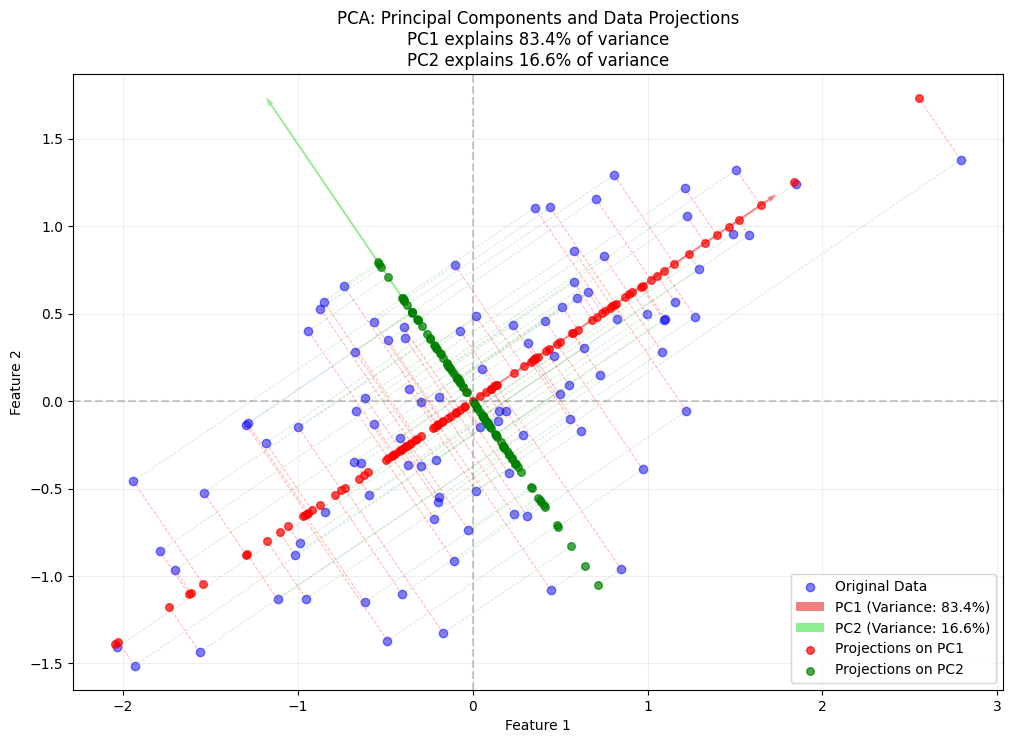

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data with elliptical shape
np.random.seed(42)
n_samples = 100
mean = [0, 0]
cov = [[1, 0.8], [0.8, 0.3]]  # Covariance matrix for elliptical distribution
data = np.random.multivariate_normal(mean, cov, n_samples)

# Center the data
centered_data = data - np.mean(data, axis=0)

# Perform PCA
pca = PCA()
pca.fit(centered_data)
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Project data onto principal components
projected_data = pca.transform(centered_data)

# Create figure
plt.figure(figsize=(12, 8))

# Plot original data
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.5, label='Original Data', color='blue')

# Plot principal components as elegant vectors
pc_scale = 2.1  # Scaling factor for PC vectors
plt.quiver(0, 0, components[0,0]*pc_scale, components[0,1]*pc_scale, 
          color='lightcoral', scale=1, scale_units='xy', angles='xy', width=0.002,
          label=f'PC1 (Variance: {100*explained_variance[0]:.1f}%)')
plt.quiver(0, 0, components[1,0]*pc_scale, components[1,1]*pc_scale, 
          color='lightgreen', scale=1, scale_units='xy', angles='xy', width=0.002,
          label=f'PC2 (Variance: {100*explained_variance[1]:.1f}%)')      

# Plot projections onto PC1 (first principal component)
for point in centered_data:
    projection_pc1 = np.dot(point, components[0]) * components[0]
    plt.plot([point[0], projection_pc1[0]], [point[1], projection_pc1[1]], 
             'r--', alpha=0.3, linewidth=0.7)

# Plot projections onto PC2 (second principal component)
for point in centered_data:
    projection_pc2 = np.dot(point, components[1]) * components[1]
    plt.plot([point[0], projection_pc2[0]], [point[1], projection_pc2[1]], 
             'g--', alpha=0.2, linewidth=0.6)

# Plot the projected points on PC1
projected_pc1 = np.dot(projected_data[:, 0][:, np.newaxis], components[0:1, :])
plt.scatter(projected_pc1[:, 0], projected_pc1[:, 1], color='red', alpha=0.7, 
            label='Projections on PC1', s=30)

# Plot the projected points on PC2
projected_pc2 = np.dot(projected_data[:, 1][:, np.newaxis], components[1:2, :])
plt.scatter(projected_pc2[:, 0], projected_pc2[:, 1], color='green', alpha=0.7, 
            label='Projections on PC2', s=30)

# Add annotations and legend
plt.axhline(0, color='black', linestyle='--', alpha=0.2)
plt.axvline(0, color='black', linestyle='--', alpha=0.2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA: Principal Components and Data Projections\n'
          f'PC1 explains {100*explained_variance[0]:.1f}% of variance\n'
          f'PC2 explains {100*explained_variance[1]:.1f}% of variance')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.axis('equal')
plt.show()

## Linear Algebra Foundations

### Data Matrix Representation

A data matrix $\mathbf{X}$ with $n$ rows (samples) and $d$ columns (features) can be written as:

$$
\mathbf{X} = 
\begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1d}\\
    x_{21} & x_{22} & \cdots & x_{2d}\\
    \vdots & \vdots & \ddots & \vdots\\
    x_{n1} & x_{n2} & \cdots & x_{nd}
\end{bmatrix}
$$

Each row $\mathbf{x}_i = (x_{i1}, x_{i2}, \ldots, x_{id})^T$ represents one sample in $d$-dimensional space.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.decomposition import PCA
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

###  Vector Operations

#### Dot Product
$$\mathbf{a}^T\mathbf{b} = \sum_{i=1}^m a_i b_i$$

#### Vector Length (Norm)
$$\|\mathbf{a}\| = \sqrt{\mathbf{a}^T\mathbf{a}} = \sqrt{\sum_{i=1}^m a_i^2}$$

#### Unit Vector
$$\mathbf{u} = \frac{\mathbf{a}}{\|\mathbf{a}\|}$$

#### Distance between Vectors
$$\|\mathbf{a} - \mathbf{b}\| = \sqrt{\sum_{i=1}^m (a_i-b_i)^2}$$

#### Angle between Vectors

$$\cos \theta = \frac{\mathbf{a}^T\mathbf{b}}{\|\mathbf{a}\|\|\mathbf{b}\|}$$



In [8]:
# Example: Vector operations
a = np.array([3, 4])
b = np.array([1, 2])

# Dot product
dot_product = np.dot(a, b)
print(f"Dot product: {dot_product}")

# Vector norms
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
print(f"Norm of a: {norm_a:.2f}")
print(f"Norm of b: {norm_b:.2f}")

# Angle between vectors
cos_theta = dot_product / (norm_a * norm_b)
theta_rad = np.arccos(cos_theta)
theta_deg = np.degrees(theta_rad)
print(f"Angle between vectors: {theta_deg:.2f} degrees")

Dot product: 11
Norm of a: 5.00
Norm of b: 2.24
Angle between vectors: 10.30 degrees


### Vector Projections

#### Projection Formula
The projection of vector $\mathbf{b}$ onto vector $\mathbf{a}$ (denoted as $\mathbf{b}_{\parallel}$) represents the component of $\mathbf{b}$ that lies along the direction of $\mathbf{a}$. This projection is computed as:  

$$
\mathbf{b}_{\parallel} = (\mathbf{a}^T \mathbf{b})\frac{\mathbf{a}}{\|\mathbf{a}\|^2}
$$

**Key Insights:**  
1. **Dot Product Interpretation ($\mathbf{a}^T \mathbf{b}$):**  
   - The dot product $\mathbf{a}^T \mathbf{b}$ measures the **alignment** between $\mathbf{a}$ and $\mathbf{b}$.  
   - If $\mathbf{a}$ and $\mathbf{b}$ are **unit vectors**, $\mathbf{a}^T \mathbf{b} = \cos \theta$ (where $\theta$ is the angle between them).  
   - For non-unit vectors, $\mathbf{a}^T \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos \theta$.  

2. **Normalization by $\|\mathbf{a}\|^2$:**  
   - Dividing by $\|\mathbf{a}\|^2$ scales the projection correctly to account for the length of $\mathbf{a}$.  
   - If $\mathbf{a}$ is a unit vector ($\|\mathbf{a}\| = 1$), the formula simplifies to:  
     
     $$
     \mathbf{b}_{\parallel} = (\mathbf{a}^T \mathbf{b}) \mathbf{a}
     $$  
     
     Here, $\mathbf{a}^T \mathbf{b}$ directly gives the **scalar projection** (length of $\mathbf{b}$ along $\mathbf{a}$), and multiplying by $\mathbf{a}$ converts it into a vector.  

3. **Geometric Interpretation:**  
   - The projection $\mathbf{b}_{\parallel}$ represents the **shadow** of $\mathbf{b}$ cast onto $\mathbf{a}$.  
   - The **residual** (perpendicular component) $\mathbf{b}_{\perp} = \mathbf{b} - \mathbf{b}_{\parallel}$ is orthogonal to $\mathbf{a}$.  
   - This decomposition is fundamental to PCA as it shows how we can represent data in terms of projections onto different directions.


**Example**  

Let $\mathbf{a} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\mathbf{b} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$.  
- **Step 1:** Compute $\mathbf{a}^T \mathbf{b} = 1 \times 3 + 0 \times 2 = 3$.  
- **Step 2:** Compute $\|\mathbf{a}\|^2 = 1^2 + 0^2 = 1$.  
- **Step 3:** Projection $\mathbf{b}_{\parallel} = \frac{3}{1} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 3 \\ 0 \end{bmatrix}$.  
- **Perpendicular Component:** $\mathbf{b}_{\perp} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} - \begin{bmatrix} 3 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 2 \end{bmatrix}$.  

**Visualization:**  
- $\mathbf{b}_{\parallel}$ retains the **x-component** of $\mathbf{b}$ (since $\mathbf{a}$ is along the x-axis).  
- $\mathbf{b}_{\perp}$ captures the remaining **y-component**, which is orthogonal to $\mathbf{a}$.  


**Next Steps:**  
We will now see how this projection concept extends to **multiple dimensions** and leads to the PCA solution via eigenvalue decomposition.  

---


In [9]:
# Example: Vector projection
def project_vector(b, a):
    """Project vector b onto vector a"""
    projection = (np.dot(a, b) / np.dot(a, a)) * a
    perpendicular = b - projection
    return projection, perpendicular

# Example vectors
a = np.array([1, 0])  # Direction vector
b = np.array([3, 2])  # Vector to project

b_parallel, b_perp = project_vector(b, a)

print(f"Original vector b: {b}")
print(f"Projection onto a: {b_parallel}")
print(f"Perpendicular component: {b_perp}")
print(f"Verification (should equal b): {b_parallel + b_perp}")

Original vector b: [3 2]
Projection onto a: [3. 0.]
Perpendicular component: [0. 2.]
Verification (should equal b): [3. 2.]


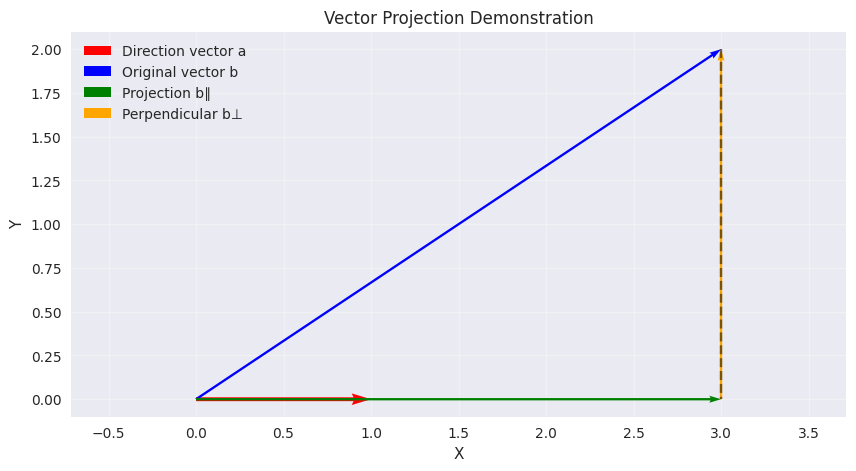

Vector a: [1 0], magnitude: 1.00
Vector b: [3 2], magnitude: 3.61
b_parallel: [3. 0.], magnitude: 3.00
b_perpendicular: [0. 2.], magnitude: 2.00


In [10]:
plt.rcParams['font.family'] = 'DejaVu Sans'  

# Visualization of vector projection
plt.figure(figsize=(10, 5))

# Plot vectors
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='Direction vector a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.003, label='Original vector b')
plt.quiver(0, 0, b_parallel[0], b_parallel[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.003, label='Projection b∥')
plt.quiver(b_parallel[0], b_parallel[1], b_perp[0], b_perp[1], angles='xy', scale_units='xy', scale=1, color='orange', width=0.003, label='Perpendicular b⊥')

# Add dotted line to show projection
plt.plot([b[0], b_parallel[0]], [b[1], b_parallel[1]], 'k--', alpha=0.5)

# Set axis limits with some padding
padding = 0.5
plt.xlim(min(0, b[0], b_parallel[0]) - padding, max(a[0], b[0], b_parallel[0]) + padding)
plt.ylim(min(0, b[1], b_parallel[1]) - padding, max(a[1], b[1], b_parallel[1]) + padding)
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 2.5)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.title('Vector Projection Demonstration')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Print the vectors and their magnitudes
print(f"Vector a: {a}, magnitude: {np.linalg.norm(a):.2f}")
print(f"Vector b: {b}, magnitude: {np.linalg.norm(b):.2f}")
print(f"b_parallel: {b_parallel}, magnitude: {np.linalg.norm(b_parallel):.2f}")
print(f"b_perpendicular: {b_perp}, magnitude: {np.linalg.norm(b_perp):.2f}")

## Basis Transformation

### Change of Basis

Any vector $\mathbf{x}$ can be expressed in terms of a new orthonormal basis $\{\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_d\}$:

$$\mathbf{x} = a_1\mathbf{u}_1 + a_2\mathbf{u}_2 + \cdots + a_d\mathbf{u}_d = \mathbf{U}\mathbf{a}$$

where $\mathbf{U}$ is the matrix with columns $\mathbf{u}_i$ and $\mathbf{a}$ contains the coordinates in the new basis:

$$\mathbf{a} = \mathbf{U}^T\mathbf{x}$$

In [11]:
# Example: Basis transformation
# Original vector
x = np.array([0.5, 1, 2])

# Standard basis (i, j, k)
standard_basis = np.eye(3)
i = standard_basis[:, 0]
j = standard_basis[:, 1]
k = standard_basis[:, 2]

print(f"Original vector x: {x}")
print(f"In standard basis: {x[0]}i + {x[1]}j + {x[2]}k")

# Create a new orthonormal basis (rotated 45° in xy-plane)
u1 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
u2 = np.array([-1/np.sqrt(2), 1/np.sqrt(2), 0])
u3 = np.array([0, 0, 1])

# New basis matrix
U = np.column_stack([u1, u2, u3])
print(U)

Original vector x: [0.5 1.  2. ]
In standard basis: 0.5i + 1.0j + 2.0k
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


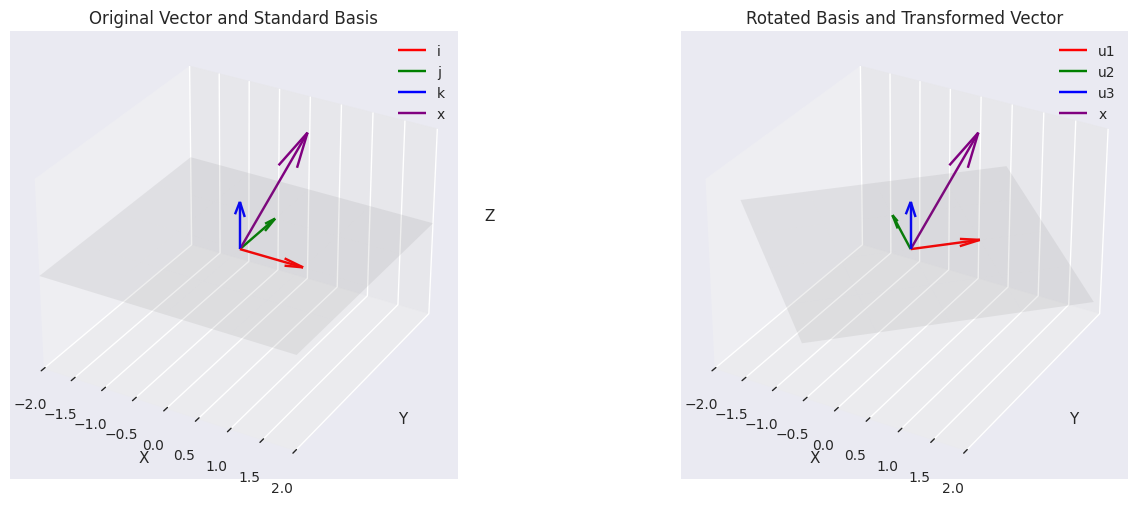

Vector x in standard basis: [0.5 1.  2. ]
Vector x in rotated basis: [1 0]


In [12]:
# Create 3D plot
fig = plt.figure(figsize=(15, 5))

# Plot 1: Original vector and standard basis
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Original Vector and Standard Basis')

# Plot standard basis vectors
ax1.quiver(0, 0, 0, i[0], i[1], i[2], color='r', label='i')
ax1.quiver(0, 0, 0, j[0], j[1], j[2], color='g', label='j')
ax1.quiver(0, 0, 0, k[0], k[1], k[2], color='b', label='k')

# Plot original vector
ax1.quiver(0, 0, 0, x[0], x[1], x[2], color='purple', label='x')

# Plot xy-plane for reference
xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
zz = np.zeros_like(xx)
ax1.plot_surface(xx, yy, zz, alpha=0.1, color='gray')

# Plot 2: Rotated basis and transformed vector
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('Rotated Basis and Transformed Vector')

# Plot rotated basis vectors
ax2.quiver(0, 0, 0, u1[0], u1[1], u1[2], color='r', label='u1')
ax2.quiver(0, 0, 0, u2[0], u2[1], u2[2], color='g', label='u2')
ax2.quiver(0, 0, 0, u3[0], u3[1], u3[2], color='b', label='u3')

# Plot original vector
ax2.quiver(0, 0, 0, x[0], x[1], x[2], color='purple', label='x')

# Plot rotated xy-plane
R = np.array([[1/np.sqrt(2), -1/np.sqrt(2), 0],
              [1/np.sqrt(2), 1/np.sqrt(2), 0],
              [0, 0, 1]])
rotated_points = R @ np.array([xx.flatten(), yy.flatten(), zz.flatten()])
rotated_xx = rotated_points[0].reshape(xx.shape)
rotated_yy = rotated_points[1].reshape(yy.shape)
rotated_zz = rotated_points[2].reshape(zz.shape)
ax2.plot_surface(rotated_xx, rotated_yy, rotated_zz, alpha=0.1, color='gray')

# Set equal aspects and labels
for ax in [ax1, ax2]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    # ax.set_xticks([])  # Disable x-axis numbers
    ax.set_yticks([])  # Disable y-axis numbers
    ax.set_zticks([])  # Disable z-axis numbers
    ax.legend()

plt.tight_layout()
plt.show()

# Print the vector coordinates in both bases
print(f"Vector x in standard basis: {x}")
print(f"Vector x in rotated basis: {a}")

### Rotation Matrix Mathematical Foundation

#### 2D Rotation Fundamentals

A rotation matrix transforms vectors by rotating them through a specified angle θ while preserving their length. For a 45° rotation in the xy-plane (θ = π/4 radians), the fundamental rotation matrix is:

$$
\mathbf{R}(\theta) = \begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

For θ = 45°:

$$
\cos(45°) = \sin(45°) = \frac{1}{\sqrt{2}} \approx 0.7071
$$

Thus, the 45° rotation matrix becomes:

$$
\mathbf{R}_{45°} = \begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

#### Basis Transformation

In your code, this rotation matrix defines new basis vectors:

```python
u1 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])  # Rotated x-axis
u2 = np.array([-1/np.sqrt(2), 1/np.sqrt(2), 0]) # Rotated y-axis 
u3 = np.array([0, 0, 1])                        # Unchanged z-axis
```

These form an orthonormal basis:
1. $\mathbf{u}_1$: Original x-axis rotated 45° counterclockwise
2. $\mathbf{u}_2$: Original y-axis rotated 45° counterclockwise
3. $\mathbf{u}_3$: Original z-axis (unchanged)

#### Key Properties

1. **Orthonormality**: 
   - $\mathbf{u}_i^T\mathbf{u}_j = \begin{cases} 
     1 & \text{if } i=j \\
     0 & \text{otherwise}
     \end{cases}$

2. **Determinant**: 
   $\det(\mathbf{R}) = 1$ (preserves orientation)

3. **Inverse**: 
   $\mathbf{R}^{-1} = \mathbf{R}^T$ (transpose reverses rotation)

#### Vector Transformation

For any vector $\mathbf{x} = [x,y,z]^T$, the rotated version is:

$$
\mathbf{x}' = \mathbf{R}\mathbf{x} = \begin{bmatrix}
\frac{x - y}{\sqrt{2}} \\
\frac{x + y}{\sqrt{2}} \\
z
\end{bmatrix}
$$

This matches your basis transformation approach where:

$$
\mathbf{x}' = x\mathbf{u}_1 + y\mathbf{u}_2 + z\mathbf{u}_3
$$

#### Why This Works

The matrix columns are the transformed standard basis vectors. When we multiply:

$$
\mathbf{R}\begin{bmatrix}1\\0\\0\end{bmatrix} = \mathbf{u}_1, \quad
\mathbf{R}\begin{bmatrix}0\\1\\0\end{bmatrix} = \mathbf{u}_2, \quad
\mathbf{R}\begin{bmatrix}0\\0\\1\end{bmatrix} = \mathbf{u}_3
$$


In [13]:
# Transform to new basis
a = U.T @ x

print(f"\nIn new basis: {a[0]:.2f}u1 + {a[1]:.2f}u2 + {a[2]:.2f}u3")

# Verify: transform back to original
x_reconstructed = U @ a
print(f"\nReconstructed x: {x_reconstructed}")
print(f"Reconstruction error: {np.linalg.norm(x - x_reconstructed):.10f}")


In new basis: 1.06u1 + 0.35u2 + 2.00u3

Reconstructed x: [0.5 1.  2. ]
Reconstruction error: 0.0000000000


## PCA Mathematical Foundation

### Variance Maximization Problem

Principal Component Analysis (PCA) seeks an orthonormal basis $\{\mathbf{u}_1, \dots, \mathbf{u}_r\}$ that captures maximal variance in the data through **sequential optimization**:

1. **First Principal Component**:  
   Find unit vector $\mathbf{u}_1$ maximizing projected variance:
   
   $$
   \max_{\|\mathbf{u}_1\|=1} \text{Var}(\mathbf{X}\mathbf{u}_1) = \max_{\|\mathbf{u}_1\|=1} \frac{1}{n}\|\mathbf{X}\mathbf{u}_1\|^2
   $$
   
2. **Subsequent Components**:  
   Each $\mathbf{u}_k$ is found by maximizing variance **orthogonal** to previous components:
   
   $$
   \max_{\|\mathbf{u}_k\|=1, \, \mathbf{u}_k \perp \{\mathbf{u}_1, \dots, \mathbf{u}_{k-1}\}} \text{Var}(\mathbf{X}\mathbf{u}_k)
   $$

Simply put, **the first principal component represents the most significant direction in the data**, retaining the maximum variability. Subsequent principal components can be extracted, but each must be **orthogonal** to the previous components to ensure they capture new and independent information.   

### Finding the first principal component

We seek a unit vector **u** that maximizes the variance of the projected data:

$$
\max_{\|\mathbf{u}\|=1} \text{Var}(\mathbf{X}\mathbf{u}) = \max_{\|\mathbf{u}\|=1} \frac{1}{n} \sum_{i=1}^n \left( \mathbf{u}^T \mathbf{x}_i - \mu_{\mathbf{u}} \right)^2
$$

where:
- $\mu_{\mathbf{u}} = \frac{1}{n} \sum_{i=1}^n \mathbf{u}^T \mathbf{x}_i = \mathbf{u}^T \left( \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i \right) = \mathbf{u}^T \bar{\mathbf{x}}$ is the mean of projected data

Expanding the variance expression:
1. Let $a_i = \mathbf{u}^T \mathbf{x}_i$ be the projected value
2. The variance becomes:
   
   $$
   \sigma^2_{\mathbf{u}} = \frac{1}{n} \sum_{i=1}^n (a_i - \mu_{\mathbf{u}})^2 
   = \frac{1}{n} \sum_{i=1}^n \left( \mathbf{u}^T \mathbf{x}_i - \mathbf{u}^T \bar{\mathbf{x}} \right)^2 
   = \frac{1}{n} \sum_{i=1}^n \left[ \mathbf{u}^T (\mathbf{x}_i - \bar{\mathbf{x}}) \right]^2
   $$
   

Let $\mathbf{z}_i = \mathbf{x}_i - \bar{\mathbf{x}}$ be the centered data points. Then:

1. Expand using $\|A\|^2 = A^TA$:

$$
\sigma^2_{\mathbf{u}} = \frac{1}{n} \sum_{i=1}^n (\mathbf{u}^T \mathbf{z}_i)^2 
= \frac{1}{n} \sum_{i=1}^n (\mathbf{u}^T \mathbf{z}_i)(\mathbf{z}_i^T \mathbf{u})
$$

2. Apply the identity $A^TB = B^TA$ to the second term:

$$
= \frac{1}{n} \sum_{i=1}^n \mathbf{u}^T \mathbf{z}_i \mathbf{z}_i^T \mathbf{u}
$$

3. Factor out $\mathbf{u}^T$ and $\mathbf{u}$:

$$
= \mathbf{u}^T \left( \frac{1}{n} \sum_{i=1}^n \mathbf{z}_i \mathbf{z}_i^T \right) \mathbf{u}
$$

4. Recognize the covariance matrix $\mathbf{C} = \frac{1}{n} \sum_{i=1}^n \mathbf{z}_i \mathbf{z}_i^T$:

$$
= \mathbf{u}^T \mathbf{C} \mathbf{u}
$$

5. Express in terms of the centered data matrix $\mathbf{Z} = [\mathbf{z}_1 \cdots \mathbf{z}_n]^T$:

$$
= \frac{1}{n} \mathbf{u}^T \mathbf{Z}^T \mathbf{Z} \mathbf{u}
= \frac{1}{n} \|\mathbf{Z}\mathbf{u}\|^2
$$

Hence the variance of the projected data is:

$$
\boxed{\sigma^2_{\mathbf{u}} = \mathbf{u}^T \mathbf{C} \mathbf{u}}
$$

#### Optimization Problem

We should maximize the projected variance $\sigma^2_\mathbf{u} = \mathbf{u}^T \mathbf{C} \mathbf{u}$ subject to the constraint $\mathbf{u}^T\mathbf{u}=1$. This constrained optimization problem can be solved using Lagrange multipliers:

$$
\max_\mathbf{u} J(\mathbf{u}) = \mathbf{u}^T \mathbf{C} \mathbf{u} - \lambda (\mathbf{u}^T\mathbf{u}-1)
$$

#### Deriving the Solution

Taking the derivative with respect to $\mathbf{u}$ and setting it to zero:

$$
\frac{\partial}{\partial \mathbf{u}} \left(\mathbf{u}^T \mathbf{C} \mathbf{u} - \lambda (\mathbf{u}^T\mathbf{u}-1)\right) = \mathbf{0}
$$

$$
2 \mathbf{C} \mathbf{u} - 2 \lambda \mathbf{u} = \mathbf{0}
$$

$$
\mathbf{C} \mathbf{u} = \lambda \mathbf{u}
$$

This shows that $\lambda$ must be an eigenvalue of the covariance matrix $\mathbf{C}$ with $\mathbf{u}$ as the corresponding eigenvector.

#### Maximizing the Variance

The projected variance can be expressed as:

$$
\sigma^2_\mathbf{u} = \mathbf{u}^T\mathbf{C}\mathbf{u} = \mathbf{u}^T \lambda \mathbf{u} = \lambda \mathbf{u}^T\mathbf{u} = \lambda
$$

Therefore, to maximize the projected variance, we must choose the largest eigenvalue $\lambda_1$ of $\mathbf{C}$. The corresponding eigenvector $\mathbf{u}_1$ gives the direction of maximum variance, known as the first principal component.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 0.3]]
X = np.random.multivariate_normal(mean, cov, 100)

C:\Users\mamin\AppData\Local\Temp\ipykernel_14000\3347236997.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 100)


In [15]:
# Center the data
X_mean = np.mean(X, axis=0)
Z = X - X_mean

# Compute covariance matrix
cov_matrix = np.dot(Z.T, Z) / (len(Z) - 1)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort by descending eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Extract PC1 (first principal component)
u1 = eigenvectors[:, 0]
λ1 = eigenvalues[0]

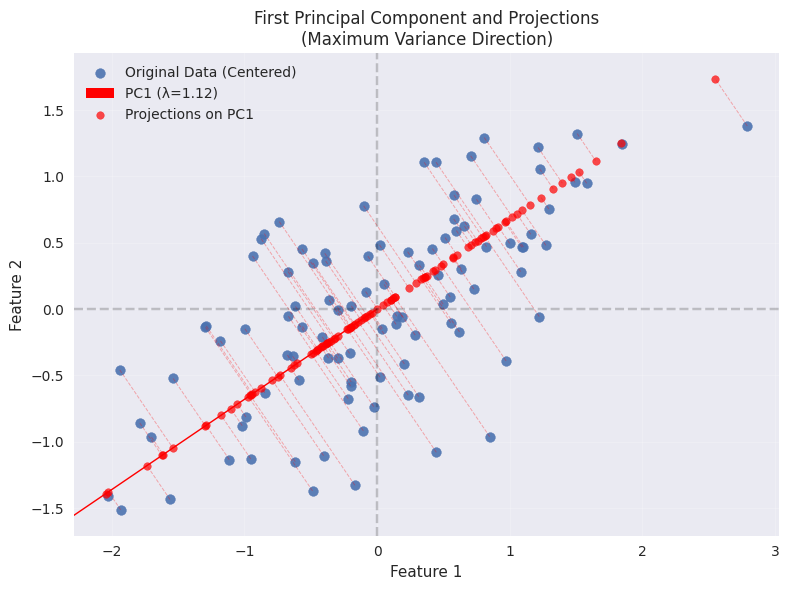

In [24]:
# Create figure
plt.figure(figsize=(8, 6))

# Plot original centered data
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.9, label='Original Data (Centered)')

# Plot PC1 direction (scaled by standard deviation)
plt.quiver(0, 0, u1[0]*3*np.sqrt(λ1), u1[1]*3*np.sqrt(λ1), 
           color='red', scale=1, scale_units='xy', angles='xy', width=0.002,
           label=f'PC1 (λ={λ1:.2f})')

# Project data onto PC1
projections = np.outer(Z @ u1, u1)  # Projection vectors

# Plot projections
plt.scatter(projections[:, 0], projections[:, 1], color='red', alpha=0.7,
           s=30, label='Projections on PC1')

# Draw projection lines
for point, proj in zip(Z, projections):
    plt.plot([point[0], proj[0]], [point[1], proj[1]], 
             'r--', alpha=0.3, linewidth=0.7)

# Formatting
plt.axhline(0, color='black', linestyle='--', alpha=0.2)
plt.axvline(0, color='black', linestyle='--', alpha=0.2)
plt.title('First Principal Component and Projections\n(Maximum Variance Direction)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(alpha=0.2)
plt.axis('equal')
plt.tight_layout()
plt.show()

## PCA Algorithm

1. **Center the data**: $\mathbf{Z} = \mathbf{X} - \mathbf{1}\cdot\mathbf{\mu}^T$
2. **Compute covariance matrix**: $\mathbf{C} = \frac{1}{n}\mathbf{Z}^T\mathbf{Z}$
3. **Find eigenvalues and eigenvectors** of $\mathbf{C}$
4. **Sort eigenvalues** in descending order
5. **Select top $r$ eigenvectors** as principal components
6. **Project data**: $\mathbf{Z}' = \mathbf{Z}\mathbf{U}_r$

In [17]:
def pca_from_scratch(X, n_components):
    """
    Implement PCA from scratch
    
    Parameters:
    X: data matrix (n_samples, n_features)
    n_components: number of principal components to keep
    
    Returns:
    X_transformed: transformed data
    components: principal components
    eigenvalues: eigenvalues
    mean: data mean
    """
    # Step 1: Center the data
    X_mean = np.mean(X, axis=0)
    Z = X - X_mean
    
    # Step 2: Compute covariance matrix
    n_samples = X.shape[0]
    cov_matrix = np.dot(Z.T, Z) / (n_samples - 1)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 5: Select top n_components
    components = eigenvectors[:, :n_components]
    
    # Step 6: Project the data
    X_transformed = np.dot(Z, components)
    
    return X_transformed, components, eigenvalues, X_mean

def reconstruct_data(X_transformed, components, mean):
    """Reconstruct original data from PCA representation"""
    X_reconstructed = np.dot(X_transformed, components.T) + mean
    return X_reconstructed

## Projection and Reconstruction in PCA

### Mathematical Foundations

Given a centered data matrix $\mathbf{Z}$ (where $\mathbf{Z} = \mathbf{X} - \mathbf{1}\mathbf{\mu}^T$) and principal components $\{\mathbf{u}_1, ..., \mathbf{u}_r\}$:

1. **Projection Coordinates**:
   The transformed coordinates $a_i$ represent how much each data point aligns with the principal directions:

   $$
   a_i^{(j)} = \mathbf{u}_i^T\mathbf{z}_j = \|\mathbf{z}_j\|\cos\theta_{i,j}
   $$

   where $\theta_{i,j}$ is the angle between $\mathbf{z}_j$ and $\mathbf{u}_i$.

2. **Matrix Form**:
   The full projection:

   $$
   \mathbf{X}_{\text{PC}} = \mathbf{Z}\mathbf{U}_r = 
   \begin{bmatrix}
   \mathbf{z}_1^T\mathbf{u}_1 & \cdots & \mathbf{z}_1^T\mathbf{u}_r \\
   \vdots & \ddots & \vdots \\
   \mathbf{z}_n^T\mathbf{u}_1 & \cdots & \mathbf{z}_n^T\mathbf{u}_r
   \end{bmatrix}
   $$

### Step-by-Step Reconstruction

1. **Reconstructing Centered Data**:
   
   $$
   \mathbf{Z}' = \mathbf{X}_{\text{PC}}\mathbf{U}_r^T = \sum_{i=1}^r a_i\mathbf{u}_i^T
   $$
   This is the best rank-$r$ approximation of $\mathbf{Z}$.

2. **Returning to Original Space**:
   
   $$
   \mathbf{X}_{\text{recon}} = \mathbf{Z}' + \mathbf{1}\mathbf{\mu}^T
   $$


### Connecting to Implementation

The Python functions implement these concepts as:

1. **Projection** (`pca_from_scratch`):
   ```python
   X_transformed = Z @ components  # ≡ 𝐙𝐔_r
   ```

2. **Reconstruction**:
   ```python
   Z_recon = X_transformed @ components.T  # ≡ 𝐗_pc𝐔_r^T
   X_recon = Z_recon + mean              # ≡ 𝐙' + 𝛍
   ```

### Visualization of Relationships

```
Original Data → Center → Project → Reconstruct → Add Mean
(X)          → (Z)    → (X_pc)  → (Z_recon)   → (X_recon)
                ↓                    ↑
             Covariance           Eigenvectors
                ↓                    ↑
             λ_i, 𝐮_i ←──────────────┘
```

### Error Analysis (Detailed)

The reconstruction error decomposes into:

1. **Per-point Error**:
   
   $$
   \mathbf{\epsilon}_j = \mathbf{z}_j - \mathbf{z}_j' = \sum_{i=r+1}^d (\mathbf{u}_i^T\mathbf{z}_j)\mathbf{u}_i
   $$

2. **Total Error**:
   
   $$
   \text{MSE} = \frac{1}{n}\sum_{j=1}^n \|\mathbf{\epsilon}_j\|^2 = \sum_{i=r+1}^d \lambda_i
   $$

### Key Insights

1. **Geometric Interpretation**:
   - Each principal component defines a new axis
   - Projection = orthogonal shadow onto these axes
   - Reconstruction = sum of shadows along all kept axes

2. **Dimensionality Trade-off**:
   - Keeping all components ($r=d$) gives perfect reconstruction
   - Reduced dimensions ($r<d$) lose $\sum_{i=r+1}^d \lambda_i$ variance

3. **Computational Notes**:
   - Centering ensures the first PC captures true max variance direction
   - Eigenvalues quantify how much each PC contributes to total variance


##  Examples and Applications

### Iris Dataset Example

In [18]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

print(f"Original data shape: {X_iris.shape}")
print(f"Features: {feature_names}")

# Apply PCA
X_pca, components, eigenvalues, mean = pca_from_scratch(X_iris, n_components=2)

# Calculate explained variance ratio
total_var = eigenvalues.sum()
explained_var_ratio = eigenvalues[:2] / total_var

print(f"\nExplained variance ratio:")
print(f"PC1: {explained_var_ratio[0]:.3f} ({explained_var_ratio[0]*100:.1f}%)")
print(f"PC2: {explained_var_ratio[1]:.3f} ({explained_var_ratio[1]*100:.1f}%)")
print(f"Total: {explained_var_ratio.sum():.3f} ({explained_var_ratio.sum()*100:.1f}%)")

Original data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Explained variance ratio:
PC1: 0.925 (92.5%)
PC2: 0.053 (5.3%)
Total: 0.978 (97.8%)


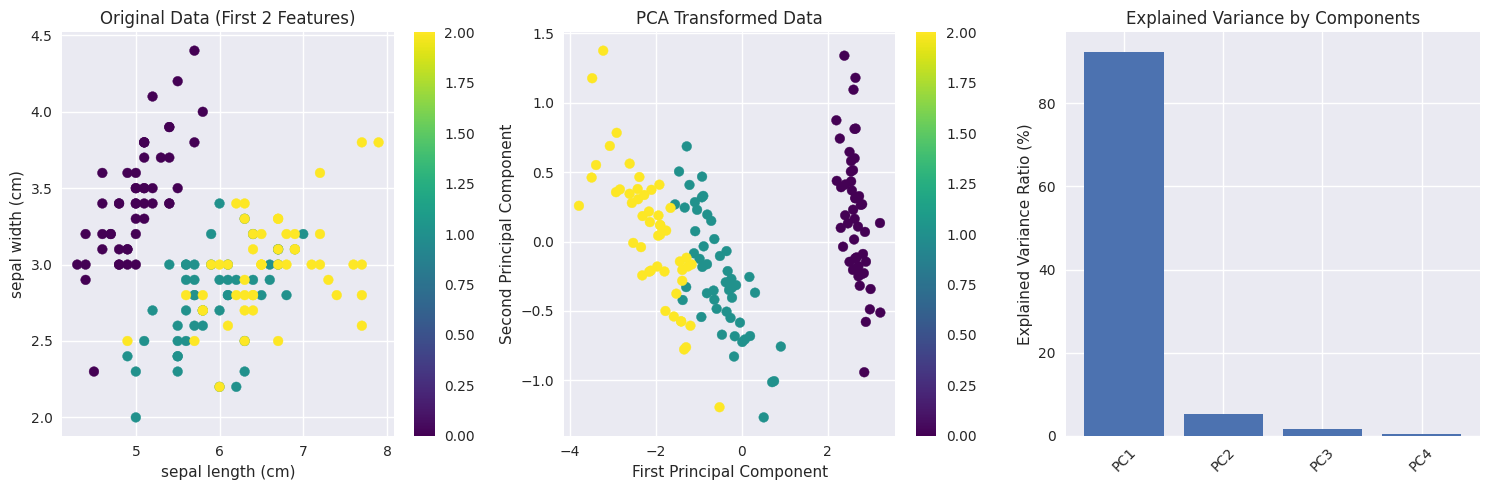

In [19]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Plot 1: Original data (first two features)
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Original Data (First 2 Features)')
plt.colorbar(scatter)

# Plot 2: PCA transformed data
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformed Data')
plt.colorbar(scatter)

# Plot 3: Explained variance
plt.subplot(1, 3, 3)
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], eigenvalues/total_var * 100)
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Explained Variance by Components')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Reconstruction Error Analysis

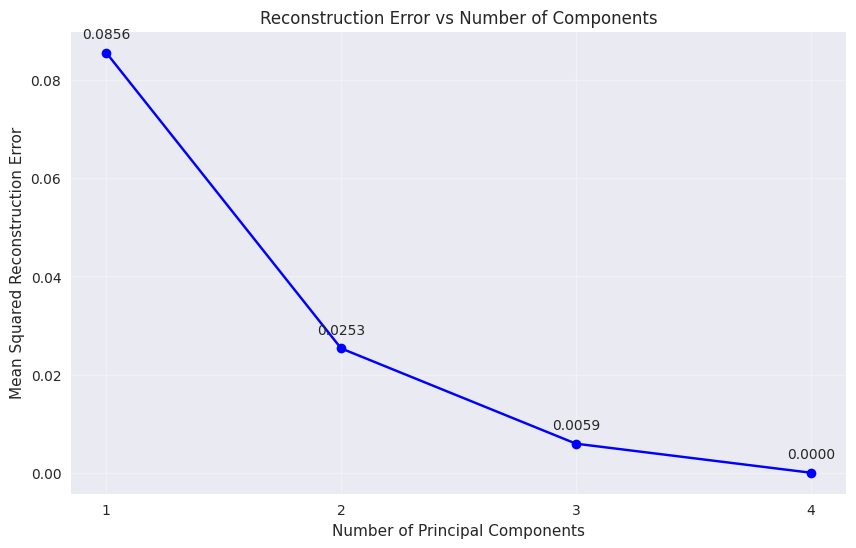

Reconstruction errors:
1 components: MSE = 0.085604
2 components: MSE = 0.025341
3 components: MSE = 0.005919
4 components: MSE = 0.000000


In [20]:
# Analyze reconstruction error for different numbers of components
n_features = X_iris.shape[1]
reconstruction_errors = []

for n_comp in range(1, n_features + 1):
    X_pca_temp, components_temp, _, mean_temp = pca_from_scratch(X_iris, n_comp)
    X_reconstructed = reconstruct_data(X_pca_temp, components_temp, mean_temp)
    
    # Calculate mean squared error
    mse = np.mean((X_iris - X_reconstructed) ** 2)
    reconstruction_errors.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features + 1), reconstruction_errors, 'bo-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.title('Reconstruction Error vs Number of Components')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, n_features + 1))

for i, error in enumerate(reconstruction_errors):
    plt.annotate(f'{error:.4f}', (i+1, error), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

print("Reconstruction errors:")
for i, error in enumerate(reconstruction_errors):
    print(f"{i+1} components: MSE = {error:.6f}")

### High-Dimensional Data Example

In [21]:
# Generate high-dimensional data with intrinsic low-dimensional structure
np.random.seed(42)
n_samples = 200
n_features = 50
n_informative = 3  # True dimensionality

# Generate data with only 3 informative dimensions
X_high_dim = np.random.randn(n_samples, n_informative)

# Create a random mixing matrix to embed in high-dimensional space
mixing_matrix = np.random.randn(n_informative, n_features)
X_mixed = X_high_dim @ mixing_matrix

# Add some noise
noise_level = 0.1
X_noisy = X_mixed + noise_level * np.random.randn(n_samples, n_features)

print(f"Generated data shape: {X_noisy.shape}")
print(f"True intrinsic dimensionality: {n_informative}")

# Apply PCA
X_pca_high, components_high, eigenvalues_high, mean_high = pca_from_scratch(X_noisy, n_components=10)

# Calculate cumulative explained variance
total_var_high = eigenvalues_high.sum()
explained_var_ratio_high = eigenvalues_high / total_var_high
cumulative_var = np.cumsum(explained_var_ratio_high)

print(f"\nExplained variance by first 10 components:")
for i in range(10):
    print(f"PC{i+1}: {explained_var_ratio_high[i]:.3f} (cumulative: {cumulative_var[i]:.3f})")

Generated data shape: (200, 50)
True intrinsic dimensionality: 3

Explained variance by first 10 components:
PC1: 0.420 (cumulative: 0.420)
PC2: 0.342 (cumulative: 0.763)
PC3: 0.234 (cumulative: 0.997)
PC4: 0.000 (cumulative: 0.997)
PC5: 0.000 (cumulative: 0.997)
PC6: 0.000 (cumulative: 0.997)
PC7: 0.000 (cumulative: 0.997)
PC8: 0.000 (cumulative: 0.998)
PC9: 0.000 (cumulative: 0.998)
PC10: 0.000 (cumulative: 0.998)


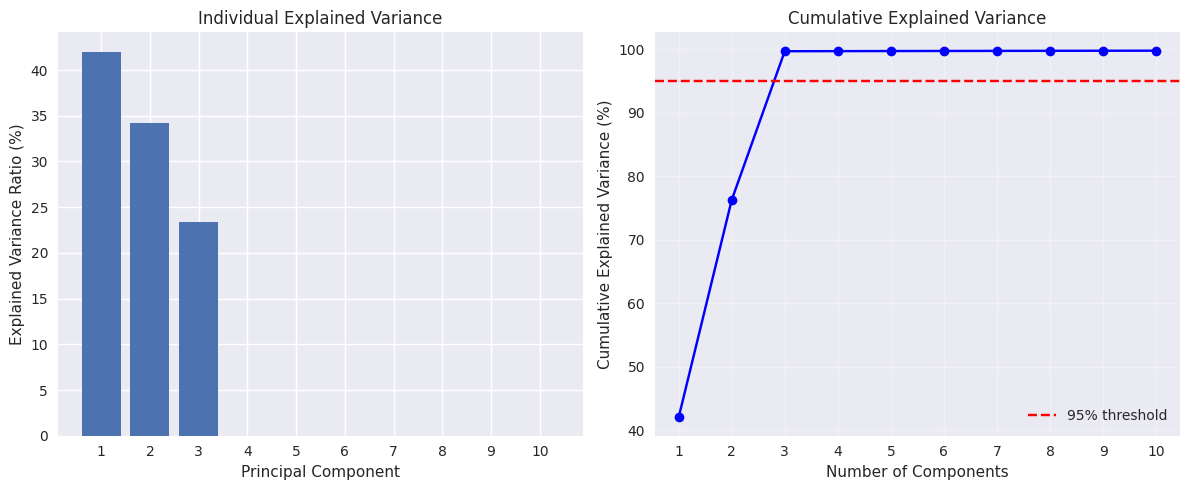


Number of components needed for 95% variance: 3
This is close to the true intrinsic dimensionality of 3


In [22]:
# Visualize the explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, 11), explained_var_ratio_high[:10] * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Individual Explained Variance')
plt.xticks(range(1, 11))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), cumulative_var[:10] * 100, 'bo-')
plt.axhline(y=95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")
print(f"This is close to the true intrinsic dimensionality of {n_informative}")

### Comparison with Scikit-learn

Comparison of implementations:
Our explained variance ratio: [0.92461872 0.05306648]
Sklearn explained variance ratio: [0.92461872 0.05306648]

Mean absolute difference in transformed data: 0.0000000000


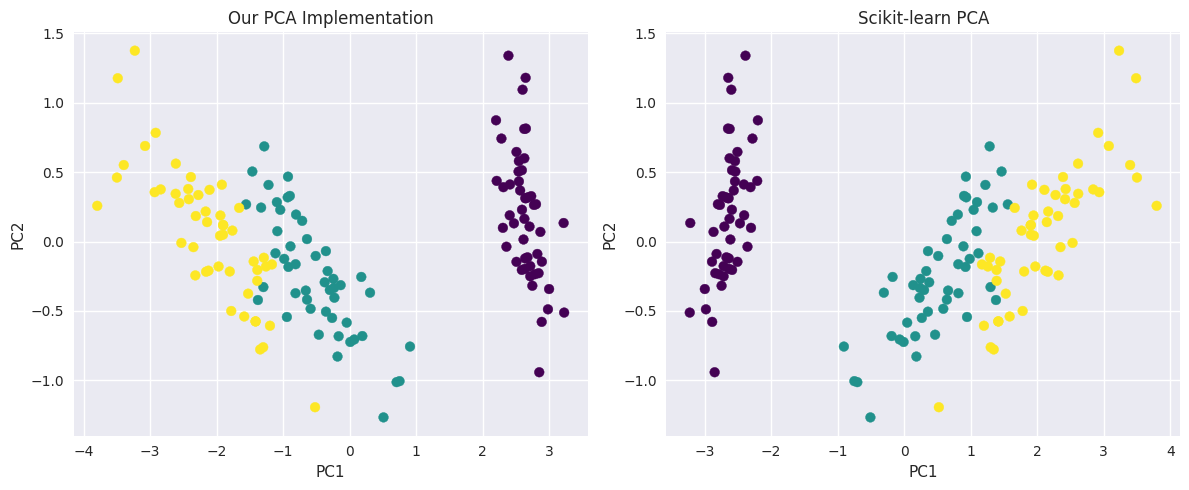

In [23]:
# Compare our implementation with scikit-learn
from sklearn.decomposition import PCA as SklearnPCA

# Our implementation
X_pca_ours, components_ours, eigenvalues_ours, mean_ours = pca_from_scratch(X_iris, n_components=2)

# Scikit-learn implementation
pca_sklearn = SklearnPCA(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X_iris)

print("Comparison of implementations:")
print(f"Our explained variance ratio: {eigenvalues_ours[:2]/eigenvalues_ours.sum()}")
print(f"Sklearn explained variance ratio: {pca_sklearn.explained_variance_ratio_}")

# The signs of eigenvectors might be different, but the results should be equivalent
print(f"\nMean absolute difference in transformed data: {np.mean(np.abs(np.abs(X_pca_ours) - np.abs(X_pca_sklearn))):.10f}")

# Visualize both results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_ours[:, 0], X_pca_ours[:, 1], c=y_iris, cmap='viridis')
plt.title('Our PCA Implementation')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y_iris, cmap='viridis')
plt.title('Scikit-learn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

Some of my previous papers are about PCA, including {cite}`JMIV-2022,Fathy08outlier,Amintoosi07icics,Amintoosi94QR`

## Summary

This tutorial covered:

1. **Linear Algebra Foundations**: Vector operations, norms, and angles
2. **Vector Projections**: Mathematical foundation for dimensionality reduction
3. **Basis Transformation**: How to represent data in different coordinate systems
4. **PCA Theory**: Variance maximization and eigenvalue decomposition
5. **Implementation**: Step-by-step PCA algorithm from scratch
6. **Applications**: Real examples with Iris dataset and high-dimensional data

### Key Takeaways:

- PCA finds directions of maximum variance in the data
- Principal components are eigenvectors of the covariance matrix
- The eigenvalues represent the amount of variance captured by each component
- PCA provides optimal linear dimensionality reduction in terms of reconstruction error
- The number of components can be chosen based on desired explained variance threshold